In [1]:
import numpy as np
import jax
jax.config.update('jax_enable_x64', True)
from jax import numpy as jnp
import matplotlib.pyplot as plt
import math

In [2]:
params = np.random.randn(3)

x = jnp.linspace(-5,21,120)
equation = 2*(x**2)+1.5*(x)+21
noise = np.random.randn(x.shape[0])*30
y = equation + noise

In [3]:
def line(params,x):
    a,b,c = params
    return a*(x**2)+b*(x)+ c

def costfun(params,x,y):
    y_pred = line(params,x)
    return jnp.mean( (y-y_pred)**2 )


In [4]:
def normalize(arr, t_min, t_max):
    norm_arr = []
    diff = t_max - t_min
    diff_arr = max(arr) - min(arr)   
    for i in arr:
        temp = (((i - min(arr))*diff)/diff_arr) + t_min
        norm_arr.append(temp)
    return norm_arr

def normalize_2d(matrix):
    norm = np.linalg.norm(matrix)
    matrix = matrix/norm
    return matrix

In [5]:
def SSE(y):
    SSe = 0
    for e in range(len(x)):
        resid = y[e] - line(params,x[e])
        SSe = SSe + resid
    return SSe

def BICk():
    order = []
    for e in range(0,10):
        val = (N*(np.log(SSE(y)))+ e*(np.log(x.shape[0])))
        order.append(val)
    return order
        

In [6]:
grad_cost = jax.value_and_grad(costfun)

In [7]:
grad_cost(params,x,y)

(DeviceArray(110986.91963094, dtype=float64),
 DeviceArray([-118549.89196195,   -7091.11916843,    -474.76384011], dtype=float64))

In [8]:
@jax.jit 
def update_params(params,x,y, lr = .001):
    cost, grad = grad_cost(params, x, y)
    params = (params - lr * grad)
    return params, cost

update_params(params,x,y)


(DeviceArray([118.83119814,   7.04746351,   0.83586236], dtype=float64),
 DeviceArray(110986.91963094, dtype=float64))

In [9]:
n_step = 10000
costs = []

for i in range(n_step):
    params, cost = update_params(params,x,y,lr = 1e-5)
    costs.append(cost)

    if i%500 == 0: 
        print(f'Cost at step {i} is {cost}')

            

Cost at step 0 is 110986.91963093735
Cost at step 500 is 1120.7568674041818
Cost at step 1000 is 1082.255887169892
Cost at step 1500 is 1050.547366933736
Cost at step 2000 is 1024.3945068164294
Cost at step 2500 is 1002.7860767101739
Cost at step 3000 is 984.8952730482631
Cost at step 3500 is 970.0460800045711
Cost at step 4000 is 957.6857663320069
Cost at step 4500 is 947.3623987133738
Cost at step 5000 is 938.7064566242009
Cost at step 5500 is 931.4158006011213
Cost at step 6000 is 925.243382262262
Cost at step 6500 is 919.9871959903494
Cost at step 7000 is 915.482063404356
Cost at step 7500 is 911.5929163232528
Cost at step 8000 is 908.2093049003258
Cost at step 8500 is 905.2409074597597
Cost at step 9000 is 902.6138593272757
Cost at step 9500 is 900.2677512721998


In [10]:
ap,bp,cp = params
ap,bp,cp
ml_eq = ap*(x**2)+bp*(x)+cp

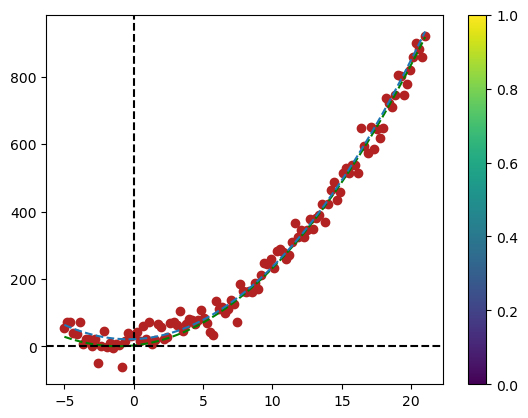

In [11]:
plt.plot(x,ml_eq, ls='--',c='green')
plt.scatter(x,y,c = 'firebrick',)
plt.colorbar()
plt.axvline(0,c='black', ls= '--')
plt.axhline(0,c='black',ls = '--')
plt.plot(x,equation,ls = '--')

In [24]:
norm_mleq = normalize(ml_eq,-1,1)
norm_y = normalize(y,-1,1)
norm_x = normalize(x,-1,1)
norm_eq = normalize(equation, -1,1)

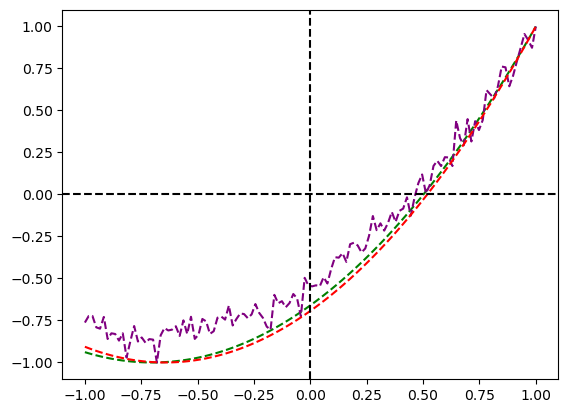

In [27]:
plt.plot(norm_x,norm_mleq, ls='--',c='green')
plt.plot(norm_x,norm_y,ls = '--', c = 'purple')
plt.plot(norm_x,norm_eq,ls = '--', c = 'red')
plt.axvline(0,c='black', ls= '--')
plt.axhline(0,c='black',ls = '--')

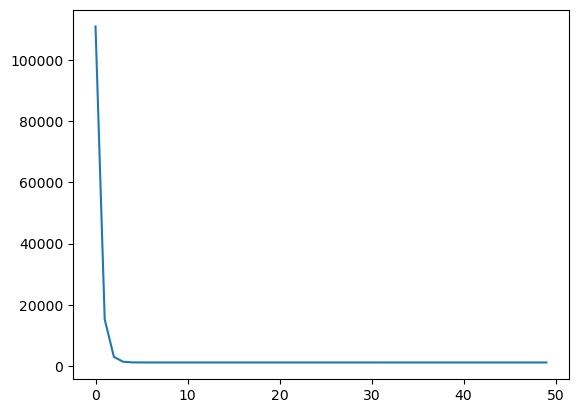

In [12]:
plt.plot(costs[:50])

In [13]:
params

DeviceArray([1.8754061 , 4.2138752 , 2.31026637], dtype=float64)

In [14]:
SSe = 

SyntaxError: invalid syntax (3724218105.py, line 1)